# 1. Import dataset

In [140]:
import pandas as pd
df = pd.read_csv(r"Raw_Dataset\combined_dataset.csv")
df

,Unnamed: 0,label,tweet
0,0,1,bad bitch
1,1,0,@user here's what's happening twitter... i'm ...
2,2,1,nothing worse than a raw cock....oh wait....#MKR
3,3,0,@user #fathersday gift for proud dads.avail...
4,4,1,The bitch is freeee!!!! ;D
...,...,...,...
55586,55586,0,he put a ring on it ððð¯ #proposal #s...
55587,55587,0,i am thankful for good health. #thankful #posi...
55588,55588,1,"""Walked in that bitch like, NIGGA WE MADE IT!"""
55589,55589,0,well done wood green sd on incentive win!!! #3...


In [141]:
#conda install --revision 2

# 2. Delete Unnecessery columns

In [142]:
df.drop(labels = ['Unnamed: 0'], axis = "columns", inplace=True)
df.head(3)

,label,tweet
0,1,bad bitch
1,0,@user here's what's happening twitter... i'm ...
2,1,nothing worse than a raw cock....oh wait....#MKR


# 3. Removing Duplicate Tuples

In [143]:
#Remove duplicates
#df = pd.DataFrame(columns = ['tweet'],index =None)
#df1['tweet']=df['tweet'].drop_duplicates(keep=False)
#df.reset_index(inplace = True)
#df.drop(columns = ['index'], inplace=True)
#df.drop(df['tweet'])
print('No. of Duplicate Rows: ', df.tweet.duplicated().sum())
print("Duplicate Rows are -- ")
print(df.loc[df.tweet.duplicated(), :])
df.drop_duplicates(keep='first',inplace = True)
print("After Deleteing Duplicate Rows")
df

No. of Duplicate Rows:  2476
Duplicate Rows are -- 
       label                                              tweet
269        0  #fallschurch   gorilla simulator: you need to ...
372        0  #model   i love u take with u all the time in ...
438        1   nothing worse than a raw cock....oh wait....#MKR
515        0  have my lover stop being angry at me visit us....
516        0  #model   i love u take with u all the time in ...
...      ...                                                ...
55465      0  today is a perfect day to be  ! #happiness #li...
55468      0  i am thankful for my enemies. #thankful #posit...
55544      0  #model   i love u take with u all the time in ...
55580      0        i am now. #i_am #positive #affirmation     
55587      0  i am thankful for good health. #thankful #posi...

[2476 rows x 2 columns]
After Deleteing Duplicate Rows


,label,tweet
0,1,bad bitch
1,0,@user here's what's happening twitter... i'm ...
2,1,nothing worse than a raw cock....oh wait....#MKR
3,0,@user #fathersday gift for proud dads.avail...
4,1,The bitch is freeee!!!! ;D
...,...,...
55585,0,@user in addition to a lack of anything meanii...
55586,0,he put a ring on it ððð¯ #proposal #s...
55588,1,"""Walked in that bitch like, NIGGA WE MADE IT!"""
55589,0,well done wood green sd on incentive win!!! #3...


# 4. Balancing DataSet

In [144]:
from sklearn.utils import shuffle
df = shuffle(df)
print(df.groupby('label').count())
label0 =  df.loc[df.label==0][:10000]
label1 =  df.loc[df.label==1][:10000]
frames = [label0,label1]
df = pd.concat(frames)
df
from sklearn.utils import shuffle
df = shuffle(df)
df

       tweet
label       
0      27517
1      25598


,label,tweet
31949,0,not long to go till #bakugp have fun everybody...
35670,0,#pocohontas i hope she is picked as vp. it wil...
41093,1,RT @taylormrake: People beg to see women's bod...
36673,0,when the girl code doesn't even exist anymore ...
3543,1,RT @lovindadrew: I don't know a bitch in the w...
...,...,...
38585,1,Irony is dead @debayan_CFC We all get bored of...
52294,1,I looked retarded
4938,1,@hayleyjoness @Fatboyisangry1 That is feminism...
13319,0,"happy fathers day to all fathers, even the dea..."


In [145]:
df.reset_index(drop=True, inplace = True)
df

,label,tweet
0,0,not long to go till #bakugp have fun everybody...
1,0,#pocohontas i hope she is picked as vp. it wil...
2,1,RT @taylormrake: People beg to see women's bod...
3,0,when the girl code doesn't even exist anymore ...
4,1,RT @lovindadrew: I don't know a bitch in the w...
...,...,...
19995,1,Irony is dead @debayan_CFC We all get bored of...
19996,1,I looked retarded
19997,1,@hayleyjoness @Fatboyisangry1 That is feminism...
19998,0,"happy fathers day to all fathers, even the dea..."


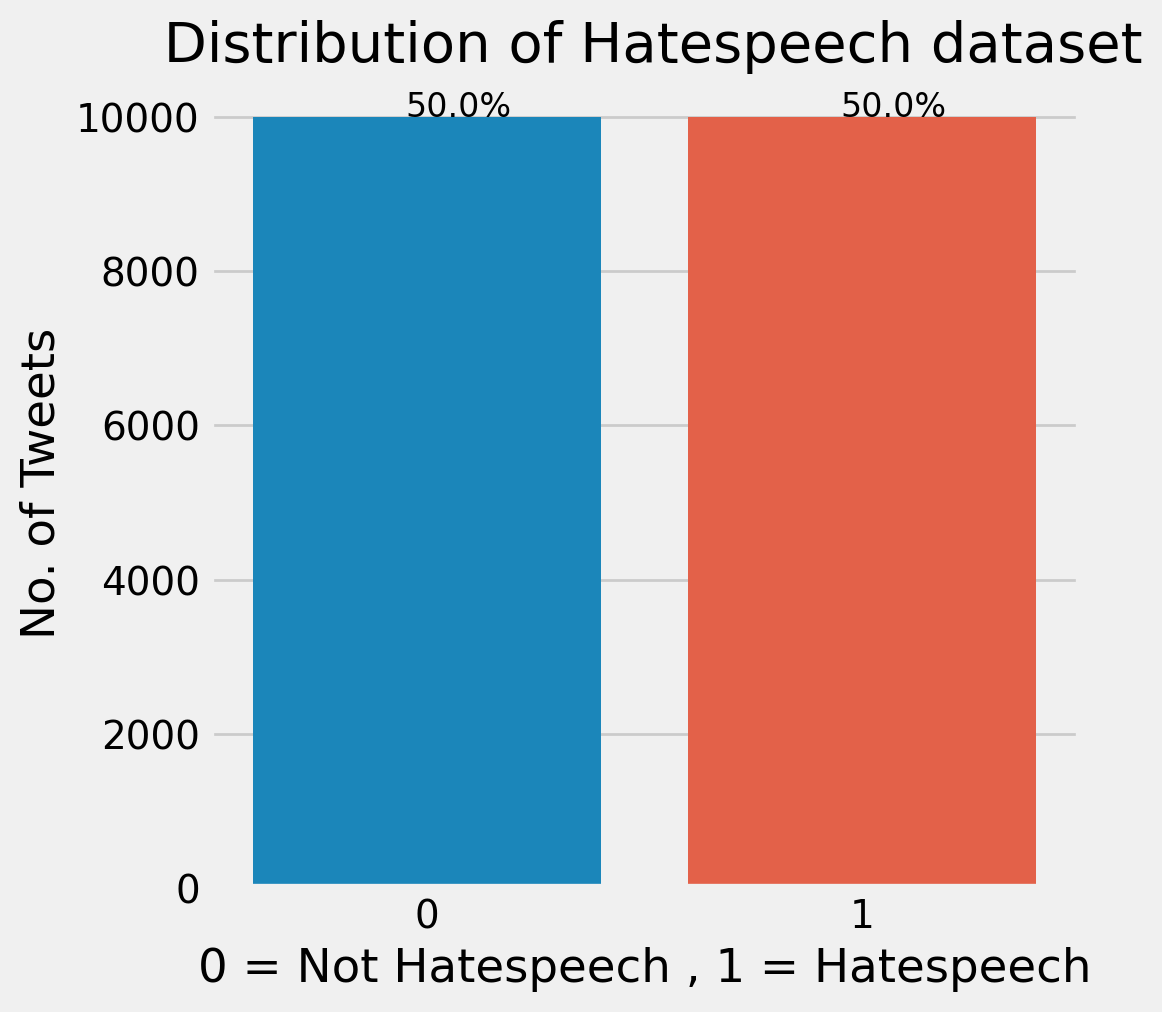

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

#function to show percentage 
def balance_df_view(df, x_axis):
    total = len(df)
    plt.rcParams["figure.figsize"] = (5,5)
    ax = sns.countplot( x= x_axis, data=df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.title(" Distribution of Hatespeech dataset")
    plt.xlabel('0 = Not Hatespeech , 1 = Hatespeech')
    plt.ylabel('No. of Tweets')
    plt.show()
  
balance_df_view(df, 'label')

# 5. Separating Independent and Dependent features (Optional)

In [147]:
X = df["tweet"]
y = df["label"]

# 6. Label Encoding (Optional)
1. Convert the list in to 0,1,2...n format
2. eg. ["a","b","a","a"]  => [ 0, 1, 0, 0 ]

In [148]:
from sklearn.preprocessing import LabelEncoder
label_encoder_obj = LabelEncoder()
y = label_encoder_obj.fit_transform(y)    #converting y axis to zero and one 

# 7. Tokenization
1. TextBlob is better than NLTK
2. It removes '#' , '@' and other unnecessery symbols.
3. it seperates here's => "here" , "'s" 

In [149]:
#to remove warnings
import warnings
warnings.filterwarnings('ignore')

In [150]:
#!pip install textblob
from textblob import TextBlob

def tokenize(string):
    return(TextBlob(string).words)

df['tokenized_tweet'] = df['tweet'].apply(tokenize)
df.head(5)


,label,tweet,tokenized_tweet
0,0,not long to go till #bakugp have fun everybody...,"[not, long, to, go, till, bakugp, have, fun, e..."
1,0,#pocohontas i hope she is picked as vp. it wil...,"[pocohontas, i, hope, she, is, picked, as, vp,..."
2,1,RT @taylormrake: People beg to see women's bod...,"[RT, taylormrake, People, beg, to, see, women,..."
3,0,when the girl code doesn't even exist anymore ...,"[when, the, girl, code, does, n't, even, exist..."
4,1,RT @lovindadrew: I don't know a bitch in the w...,"[RT, lovindadrew, I, do, n't, know, a, bitch, ..."


# 8. Text Preprocessing
1. Convert all tweets into lowercase
2. Remove Punctuation

## Step 1:  Removing Un_necessary symbols
### A. Remove URL, EMOJI, NUMBER, SMILEY, RESERVED, MENTION)
### B. Converting into lowercase


In [151]:
#Returns cleaned list ( remove URL, EMOJI, NUMBER, SMILEY, RESERVED, MENTION)
#!pip install tweet-preprocessor
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.NUMBER, p.OPT.SMILEY,p.OPT.RESERVED, p.OPT.MENTION)

def remove_U_E_N_S_R_M_lower(df_tweet):
    temp_list2 =[]
    for x in df_tweet:
        temp_list1 =[]
        for y in x:
            temp_list1.append(p.clean(y).lower())      #converting all into lower case first
        temp_list2.append(temp_list1) 
    return(temp_list2)

df['preproc_step_1'] = remove_U_E_N_S_R_M_lower(df['tokenized_tweet'])
df.head()

,label,tweet,tokenized_tweet,preproc_step_1
0,0,not long to go till #bakugp have fun everybody...,"[not, long, to, go, till, bakugp, have, fun, e...","[not, long, to, go, till, bakugp, have, fun, e..."
1,0,#pocohontas i hope she is picked as vp. it wil...,"[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, i, hope, she, is, picked, as, vp,..."
2,1,RT @taylormrake: People beg to see women's bod...,"[RT, taylormrake, People, beg, to, see, women,...","[, taylormrake, people, beg, to, see, women, '..."
3,0,when the girl code doesn't even exist anymore ...,"[when, the, girl, code, does, n't, even, exist...","[when, the, girl, code, does, n't, even, exist..."
4,1,RT @lovindadrew: I don't know a bitch in the w...,"[RT, lovindadrew, I, do, n't, know, a, bitch, ...","[, lovindadrew, i, do, n't, know, a, bitch, in..."


## Step 2: Removing Accented Characters
###  A. Remove Accented Characters

In [152]:
import unicodedata
# Remove accented characters like é, ñ etc.

def remove_accented_chars(df_tweet):
    temp_list2 = []
    for row in df_tweet:
        temp_list1 = []
        for word in row:
            if(word != ""):
                temp_word = unicodedata.normalize('NFKD',word).encode('ascii','ignore').decode('utf-8','ignore')
                temp_list1.append(temp_word)
            else:
                continue
        temp_list2.append(temp_list1)
    return(temp_list2)


df['preproc_step_2'] = remove_accented_chars(df['preproc_step_1'])
df.head()

,label,tweet,tokenized_tweet,preproc_step_1,preproc_step_2
0,0,not long to go till #bakugp have fun everybody...,"[not, long, to, go, till, bakugp, have, fun, e...","[not, long, to, go, till, bakugp, have, fun, e...","[not, long, to, go, till, bakugp, have, fun, e..."
1,0,#pocohontas i hope she is picked as vp. it wil...,"[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, i, hope, she, is, picked, as, vp,..."
2,1,RT @taylormrake: People beg to see women's bod...,"[RT, taylormrake, People, beg, to, see, women,...","[, taylormrake, people, beg, to, see, women, '...","[taylormrake, people, beg, to, see, women, 's,..."
3,0,when the girl code doesn't even exist anymore ...,"[when, the, girl, code, does, n't, even, exist...","[when, the, girl, code, does, n't, even, exist...","[when, the, girl, code, does, n't, even, exist..."
4,1,RT @lovindadrew: I don't know a bitch in the w...,"[RT, lovindadrew, I, do, n't, know, a, bitch, ...","[, lovindadrew, i, do, n't, know, a, bitch, in...","[lovindadrew, i, do, n't, know, a, bitch, in, ..."


## Step 3:  Removing Default Stop Words
### A. Using Spacy Library because it covers 326 stopwords including " 's " " 've " etc.
### B. Removing Custom Stopwords.

In [153]:
#!pip install spacy
#python -m spacy download en_core_web_sm
import spacy
#loading english language small model of the spacy
en = spacy.load('en_core_web_sm')
stop_words = en.Defaults.stop_words


def remove_stop_words(df_tweet):
    temp_list1 = []
    for row in df_tweet:
        temp_list1.append([word for word in row if word.lower() not in stop_words])
    return(temp_list1)


df['preproc_step_3'] = remove_stop_words(df['preproc_step_2'])
df.head()

,label,tweet,tokenized_tweet,preproc_step_1,preproc_step_2,preproc_step_3
0,0,not long to go till #bakugp have fun everybody...,"[not, long, to, go, till, bakugp, have, fun, e...","[not, long, to, go, till, bakugp, have, fun, e...","[not, long, to, go, till, bakugp, have, fun, e...","[long, till, bakugp, fun, everybody, race, f1,..."
1,0,#pocohontas i hope she is picked as vp. it wil...,"[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, hope, picked, vp, happen, lied, h..."
2,1,RT @taylormrake: People beg to see women's bod...,"[RT, taylormrake, People, beg, to, see, women,...","[, taylormrake, people, beg, to, see, women, '...","[taylormrake, people, beg, to, see, women, 's,...","[taylormrake, people, beg, women, bodies, minu..."
3,0,when the girl code doesn't even exist anymore ...,"[when, the, girl, code, does, n't, even, exist...","[when, the, girl, code, does, n't, even, exist...","[when, the, girl, code, does, n't, even, exist...","[girl, code, exist, anymore, rant, helpless, g..."
4,1,RT @lovindadrew: I don't know a bitch in the w...,"[RT, lovindadrew, I, do, n't, know, a, bitch, ...","[, lovindadrew, i, do, n't, know, a, bitch, in...","[lovindadrew, i, do, n't, know, a, bitch, in, ...","[lovindadrew, know, bitch, world, claim, busy,..."


## Step 4: Removing Custom Stop Words

-


In [154]:
my_stopwords = ['i','nt','user','http','u','go', 'me', 'my','I','i', 'myself','y', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
def remove_custom_stop_words(df_tweet):
    temp_list1 = []
    for row in df_tweet:
        temp_list1.append([word for word in row if word not in my_stopwords])
    return(temp_list1)

df['preproc_step_4'] = remove_custom_stop_words(df['preproc_step_3'])
df.head()

,label,tweet,tokenized_tweet,preproc_step_1,preproc_step_2,preproc_step_3,preproc_step_4
0,0,not long to go till #bakugp have fun everybody...,"[not, long, to, go, till, bakugp, have, fun, e...","[not, long, to, go, till, bakugp, have, fun, e...","[not, long, to, go, till, bakugp, have, fun, e...","[long, till, bakugp, fun, everybody, race, f1,...","[long, till, bakugp, fun, everybody, race, f1,..."
1,0,#pocohontas i hope she is picked as vp. it wil...,"[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, hope, picked, vp, happen, lied, h...","[pocohontas, hope, picked, vp, happen, lied, h..."
2,1,RT @taylormrake: People beg to see women's bod...,"[RT, taylormrake, People, beg, to, see, women,...","[, taylormrake, people, beg, to, see, women, '...","[taylormrake, people, beg, to, see, women, 's,...","[taylormrake, people, beg, women, bodies, minu...","[taylormrake, people, beg, women, bodies, minu..."
3,0,when the girl code doesn't even exist anymore ...,"[when, the, girl, code, does, n't, even, exist...","[when, the, girl, code, does, n't, even, exist...","[when, the, girl, code, does, n't, even, exist...","[girl, code, exist, anymore, rant, helpless, g...","[girl, code, exist, anymore, rant, helpless, g..."
4,1,RT @lovindadrew: I don't know a bitch in the w...,"[RT, lovindadrew, I, do, n't, know, a, bitch, ...","[, lovindadrew, i, do, n't, know, a, bitch, in...","[lovindadrew, i, do, n't, know, a, bitch, in, ...","[lovindadrew, know, bitch, world, claim, busy,...","[lovindadrew, know, bitch, world, claim, busy,..."


## Step 5: Remove Punctuation
### A. Remove punctuation which does not needs space.
### B. Remove punctuation which needs space

In [155]:
#!pip install tweet-preprocessor

# re.compile a regular expression pattern into a regular expression object, 
# which can be used for matching using its match(), search(), findall(), sub and others..
import re
import preprocessor as p

def remove_punctuation(df_tweet):
    PUNCTUATION = re.compile("(\")|(\>)|(\})|(\])|(\{)|(\;)|(\<)|(\%)|(\|)|(\()|(\))|(\$)|(\!)|(\.)|(\[)|(\?)|(\,)|(\')|(^\,)|(\:)|^(\s+)|(\s+)$")
    PUNCTUATION_NEEDS_SPACE = re.compile("([0-9])|(:)|(_)|(-)|(<br)|(/)|(\s\s+)|(?<!\w)\w(?!\w)")
    temp_list2 = []
    for row in df_tweet:
        temp_list1 = []
        for word in row:
            if(word != ""):
                temp_word = PUNCTUATION.sub("", word)
                temp_word = PUNCTUATION_NEEDS_SPACE.sub(" ",temp_word)
                temp_list1.append(temp_word)
            else:
                continue
        temp_list2.append(temp_list1)
    return(temp_list2)

df['preproc_step_5'] = remove_punctuation(df['preproc_step_4'])
df.head()


,label,tweet,tokenized_tweet,preproc_step_1,preproc_step_2,preproc_step_3,preproc_step_4,preproc_step_5
0,0,not long to go till #bakugp have fun everybody...,"[not, long, to, go, till, bakugp, have, fun, e...","[not, long, to, go, till, bakugp, have, fun, e...","[not, long, to, go, till, bakugp, have, fun, e...","[long, till, bakugp, fun, everybody, race, f1,...","[long, till, bakugp, fun, everybody, race, f1,...","[long, till, bakugp, fun, everybody, race, f ,..."
1,0,#pocohontas i hope she is picked as vp. it wil...,"[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, hope, picked, vp, happen, lied, h...","[pocohontas, hope, picked, vp, happen, lied, h...","[pocohontas, hope, picked, vp, happen, lied, h..."
2,1,RT @taylormrake: People beg to see women's bod...,"[RT, taylormrake, People, beg, to, see, women,...","[, taylormrake, people, beg, to, see, women, '...","[taylormrake, people, beg, to, see, women, 's,...","[taylormrake, people, beg, women, bodies, minu...","[taylormrake, people, beg, women, bodies, minu...","[taylormrake, people, beg, women, bodies, minu..."
3,0,when the girl code doesn't even exist anymore ...,"[when, the, girl, code, does, n't, even, exist...","[when, the, girl, code, does, n't, even, exist...","[when, the, girl, code, does, n't, even, exist...","[girl, code, exist, anymore, rant, helpless, g...","[girl, code, exist, anymore, rant, helpless, g...","[girl, code, exist, anymore, rant, helpless, g..."
4,1,RT @lovindadrew: I don't know a bitch in the w...,"[RT, lovindadrew, I, do, n't, know, a, bitch, ...","[, lovindadrew, i, do, n't, know, a, bitch, in...","[lovindadrew, i, do, n't, know, a, bitch, in, ...","[lovindadrew, know, bitch, world, claim, busy,...","[lovindadrew, know, bitch, world, claim, busy,...","[lovindadrew, know, bitch, world, claim, busy,..."


## Step 6: Lemmatization

In [156]:
import spacy
nlp = spacy.load('en_core_web_sm')

def lemmatization(df_tweet):
    temp_list2 = []
    for row in df_tweet:
        temp_list1 = []
        listToStr = ' '.join([element for element in row])
        for word in nlp(listToStr):
            lemma = word.lemma_
            temp_list1.append(lemma)
        temp_list2.append(temp_list1)
    return(temp_list2)



df['preproc_step_6'] = lemmatization(df['preproc_step_5'])
df.head()

,label,tweet,tokenized_tweet,preproc_step_1,preproc_step_2,preproc_step_3,preproc_step_4,preproc_step_5,preproc_step_6
0,0,not long to go till #bakugp have fun everybody...,"[not, long, to, go, till, bakugp, have, fun, e...","[not, long, to, go, till, bakugp, have, fun, e...","[not, long, to, go, till, bakugp, have, fun, e...","[long, till, bakugp, fun, everybody, race, f1,...","[long, till, bakugp, fun, everybody, race, f1,...","[long, till, bakugp, fun, everybody, race, f ,...","[long, till, bakugp, fun, everybody, race, f, ..."
1,0,#pocohontas i hope she is picked as vp. it wil...,"[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, hope, picked, vp, happen, lied, h...","[pocohontas, hope, picked, vp, happen, lied, h...","[pocohontas, hope, picked, vp, happen, lied, h...","[pocohonta, hope, pick, vp, happen, lie, herit..."
2,1,RT @taylormrake: People beg to see women's bod...,"[RT, taylormrake, People, beg, to, see, women,...","[, taylormrake, people, beg, to, see, women, '...","[taylormrake, people, beg, to, see, women, 's,...","[taylormrake, people, beg, women, bodies, minu...","[taylormrake, people, beg, women, bodies, minu...","[taylormrake, people, beg, women, bodies, minu...","[taylormrake, people, beg, woman, body, minute..."
3,0,when the girl code doesn't even exist anymore ...,"[when, the, girl, code, does, n't, even, exist...","[when, the, girl, code, does, n't, even, exist...","[when, the, girl, code, does, n't, even, exist...","[girl, code, exist, anymore, rant, helpless, g...","[girl, code, exist, anymore, rant, helpless, g...","[girl, code, exist, anymore, rant, helpless, g...","[girl, code, exist, anymore, rant, helpless, g..."
4,1,RT @lovindadrew: I don't know a bitch in the w...,"[RT, lovindadrew, I, do, n't, know, a, bitch, ...","[, lovindadrew, i, do, n't, know, a, bitch, in...","[lovindadrew, i, do, n't, know, a, bitch, in, ...","[lovindadrew, know, bitch, world, claim, busy,...","[lovindadrew, know, bitch, world, claim, busy,...","[lovindadrew, know, bitch, world, claim, busy,...","[lovindadrew, know, bitch, world, claim, busy,..."


# 9. Remove Single and Double remaining characters in sentence

In [157]:


def remove_singleChar(df_tweet):
    SINGLE_OR_DOUBLE_CHARACTERS = re.compile(r'(?<![\w\-])\w(?![\w\-])|(?<![\w\-])\w\w(?![\w\-])')
    temp_list2 = []
    for row in df_tweet:
        temp_list1 = []
        for word in row:
            if(word != ""):
                temp_word = SINGLE_OR_DOUBLE_CHARACTERS.sub("",word)
                temp_list1.append(temp_word)
            else:
                continue
        temp_list2.append(temp_list1)
    return(temp_list2)

df['preproc_step_7'] = remove_singleChar(df['preproc_step_6'])
df.head()

,label,tweet,tokenized_tweet,preproc_step_1,preproc_step_2,preproc_step_3,preproc_step_4,preproc_step_5,preproc_step_6,preproc_step_7
0,0,not long to go till #bakugp have fun everybody...,"[not, long, to, go, till, bakugp, have, fun, e...","[not, long, to, go, till, bakugp, have, fun, e...","[not, long, to, go, till, bakugp, have, fun, e...","[long, till, bakugp, fun, everybody, race, f1,...","[long, till, bakugp, fun, everybody, race, f1,...","[long, till, bakugp, fun, everybody, race, f ,...","[long, till, bakugp, fun, everybody, race, f, ...","[long, till, bakugp, fun, everybody, race, , ..."
1,0,#pocohontas i hope she is picked as vp. it wil...,"[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, hope, picked, vp, happen, lied, h...","[pocohontas, hope, picked, vp, happen, lied, h...","[pocohontas, hope, picked, vp, happen, lied, h...","[pocohonta, hope, pick, vp, happen, lie, herit...","[pocohonta, hope, pick, , happen, lie, heritage]"
2,1,RT @taylormrake: People beg to see women's bod...,"[RT, taylormrake, People, beg, to, see, women,...","[, taylormrake, people, beg, to, see, women, '...","[taylormrake, people, beg, to, see, women, 's,...","[taylormrake, people, beg, women, bodies, minu...","[taylormrake, people, beg, women, bodies, minu...","[taylormrake, people, beg, women, bodies, minu...","[taylormrake, people, beg, woman, body, minute...","[taylormrake, people, beg, woman, body, minute..."
3,0,when the girl code doesn't even exist anymore ...,"[when, the, girl, code, does, n't, even, exist...","[when, the, girl, code, does, n't, even, exist...","[when, the, girl, code, does, n't, even, exist...","[girl, code, exist, anymore, rant, helpless, g...","[girl, code, exist, anymore, rant, helpless, g...","[girl, code, exist, anymore, rant, helpless, g...","[girl, code, exist, anymore, rant, helpless, g...","[girl, code, exist, anymore, rant, helpless, g..."
4,1,RT @lovindadrew: I don't know a bitch in the w...,"[RT, lovindadrew, I, do, n't, know, a, bitch, ...","[, lovindadrew, i, do, n't, know, a, bitch, in...","[lovindadrew, i, do, n't, know, a, bitch, in, ...","[lovindadrew, know, bitch, world, claim, busy,...","[lovindadrew, know, bitch, world, claim, busy,...","[lovindadrew, know, bitch, world, claim, busy,...","[lovindadrew, know, bitch, world, claim, busy,...","[lovindadrew, know, bitch, world, claim, busy,..."


# 10. Untokenize Final Processed dataset

In [158]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
def untokenize(df_tweet):
    return(df_tweet.apply(TreebankWordDetokenizer().detokenize))
df['preproc_step_8'] = untokenize(df['preproc_step_7'])




In [159]:
df.head(10)

,label,tweet,tokenized_tweet,preproc_step_1,preproc_step_2,preproc_step_3,preproc_step_4,preproc_step_5,preproc_step_6,preproc_step_7,preproc_step_8
0,0,not long to go till #bakugp have fun everybody...,"[not, long, to, go, till, bakugp, have, fun, e...","[not, long, to, go, till, bakugp, have, fun, e...","[not, long, to, go, till, bakugp, have, fun, e...","[long, till, bakugp, fun, everybody, race, f1,...","[long, till, bakugp, fun, everybody, race, f1,...","[long, till, bakugp, fun, everybody, race, f ,...","[long, till, bakugp, fun, everybody, race, f, ...","[long, till, bakugp, fun, everybody, race, , ...",long till bakugp fun everybody race europegp
1,0,#pocohontas i hope she is picked as vp. it wil...,"[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, hope, picked, vp, happen, lied, h...","[pocohontas, hope, picked, vp, happen, lied, h...","[pocohontas, hope, picked, vp, happen, lied, h...","[pocohonta, hope, pick, vp, happen, lie, herit...","[pocohonta, hope, pick, , happen, lie, heritage]",pocohonta hope pick happen lie heritage
2,1,RT @taylormrake: People beg to see women's bod...,"[RT, taylormrake, People, beg, to, see, women,...","[, taylormrake, people, beg, to, see, women, '...","[taylormrake, people, beg, to, see, women, 's,...","[taylormrake, people, beg, women, bodies, minu...","[taylormrake, people, beg, women, bodies, minu...","[taylormrake, people, beg, women, bodies, minu...","[taylormrake, people, beg, woman, body, minute...","[taylormrake, people, beg, woman, body, minute...",taylormrake people beg woman body minute see w...
3,0,when the girl code doesn't even exist anymore ...,"[when, the, girl, code, does, n't, even, exist...","[when, the, girl, code, does, n't, even, exist...","[when, the, girl, code, does, n't, even, exist...","[girl, code, exist, anymore, rant, helpless, g...","[girl, code, exist, anymore, rant, helpless, g...","[girl, code, exist, anymore, rant, helpless, g...","[girl, code, exist, anymore, rant, helpless, g...","[girl, code, exist, anymore, rant, helpless, g...",girl code exist anymore rant helpless girl wis...
4,1,RT @lovindadrew: I don't know a bitch in the w...,"[RT, lovindadrew, I, do, n't, know, a, bitch, ...","[, lovindadrew, i, do, n't, know, a, bitch, in...","[lovindadrew, i, do, n't, know, a, bitch, in, ...","[lovindadrew, know, bitch, world, claim, busy,...","[lovindadrew, know, bitch, world, claim, busy,...","[lovindadrew, know, bitch, world, claim, busy,...","[lovindadrew, know, bitch, world, claim, busy,...","[lovindadrew, know, bitch, world, claim, busy,...",lovindadrew know bitch world claim busy nigga ...
5,1,Fucking hate my coon ahh uncle,"[Fucking, hate, my, coon, ahh, uncle]","[fucking, hate, my, coon, ahh, uncle]","[fucking, hate, my, coon, ahh, uncle]","[fucking, hate, coon, ahh, uncle]","[fucking, hate, coon, ahh, uncle]","[fucking, hate, coon, ahh, uncle]","[fucking, hate, coon, ahh, uncle]","[fucking, hate, coon, ahh, uncle]",fucking hate coon ahh uncle
6,1,@heyyayled do i have to repeat myself u white ...,"[heyyayled, do, i, have, to, repeat, myself, u...","[heyyayled, do, i, have, to, repeat, myself, u...","[heyyayled, do, i, have, to, repeat, myself, u...","[heyyayled, repeat, u, white, trash]","[heyyayled, repeat, white, trash]","[heyyayled, repeat, white, trash]","[heyyayle, repeat, white, trash]","[heyyayle, repeat, white, trash]",heyyayle repeat white trash
7,1,"Apple sauce, bitch.","[Apple, sauce, bitch]","[apple, sauce, bitch]","[apple, sauce, bitch]","[apple, sauce, bitch]","[apple, sauce, bitch]","[apple, sauce, bitch]","[apple, sauce, bitch]","[apple, sauce, bitch]",apple sauce bitch
8,0,@user âand how does he make you so ? even ...,"[user, âand, how, does, he, make, you, so, e...","[user, and, how, does, he, make, you, so, even...","[user, and, how, does, he, make, you, so, even...","[user, youve, got, find, kind, h]","[youv

# 11. Drop NaN Value

In [160]:
df["preproc_step_8"].iloc[767]
df_filtered = df[df['preproc_step_8'] == '']
df_filtered.count()
print("NaN Count: ",df_filtered.shape)
df.drop(df[df['preproc_step_8'] == ''].index, inplace = True)
print("Total Count after Drop NaN: ",df.shape)
df.head(2)

NaN Count:  (31, 11)
Total Count after Drop NaN:  (19969, 11)


,label,tweet,tokenized_tweet,preproc_step_1,preproc_step_2,preproc_step_3,preproc_step_4,preproc_step_5,preproc_step_6,preproc_step_7,preproc_step_8
0,0,not long to go till #bakugp have fun everybody...,"[not, long, to, go, till, bakugp, have, fun, e...","[not, long, to, go, till, bakugp, have, fun, e...","[not, long, to, go, till, bakugp, have, fun, e...","[long, till, bakugp, fun, everybody, race, f1,...","[long, till, bakugp, fun, everybody, race, f1,...","[long, till, bakugp, fun, everybody, race, f ,...","[long, till, bakugp, fun, everybody, race, f, ...","[long, till, bakugp, fun, everybody, race, , ...",long till bakugp fun everybody race europegp
1,0,#pocohontas i hope she is picked as vp. it wil...,"[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, i, hope, she, is, picked, as, vp,...","[pocohontas, hope, picked, vp, happen, lied, h...","[pocohontas, hope, picked, vp, happen, lied, h...","[pocohontas, hope, picked, vp, happen, lied, h...","[pocohonta, hope, pick, vp, happen, lie, herit...","[pocohonta, hope, pick, , happen, lie, heritage]",pocohonta hope pick happen lie heritage


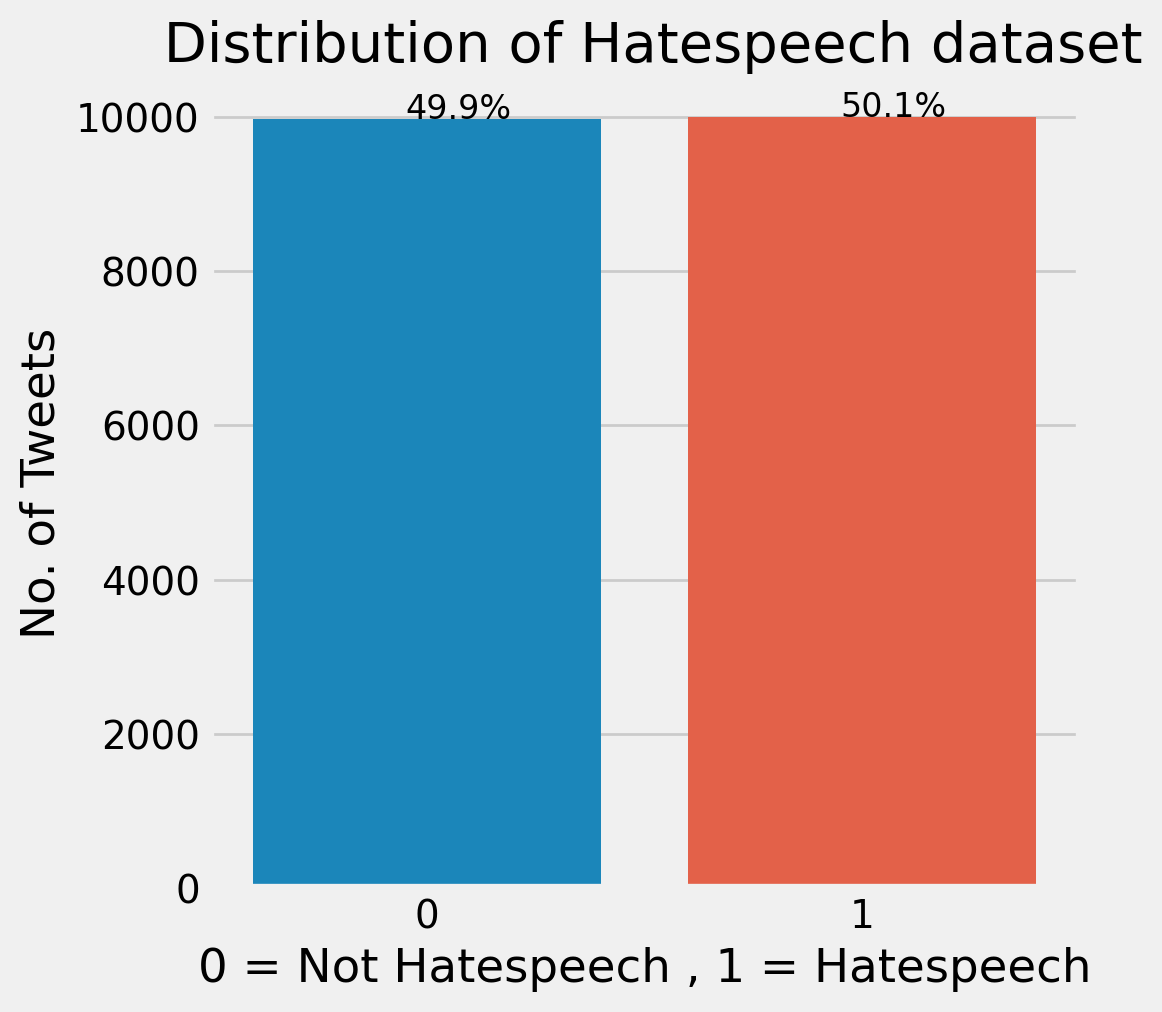

In [161]:
balance_df_view(df,'label')

# 12. Finding Frequency Distribution

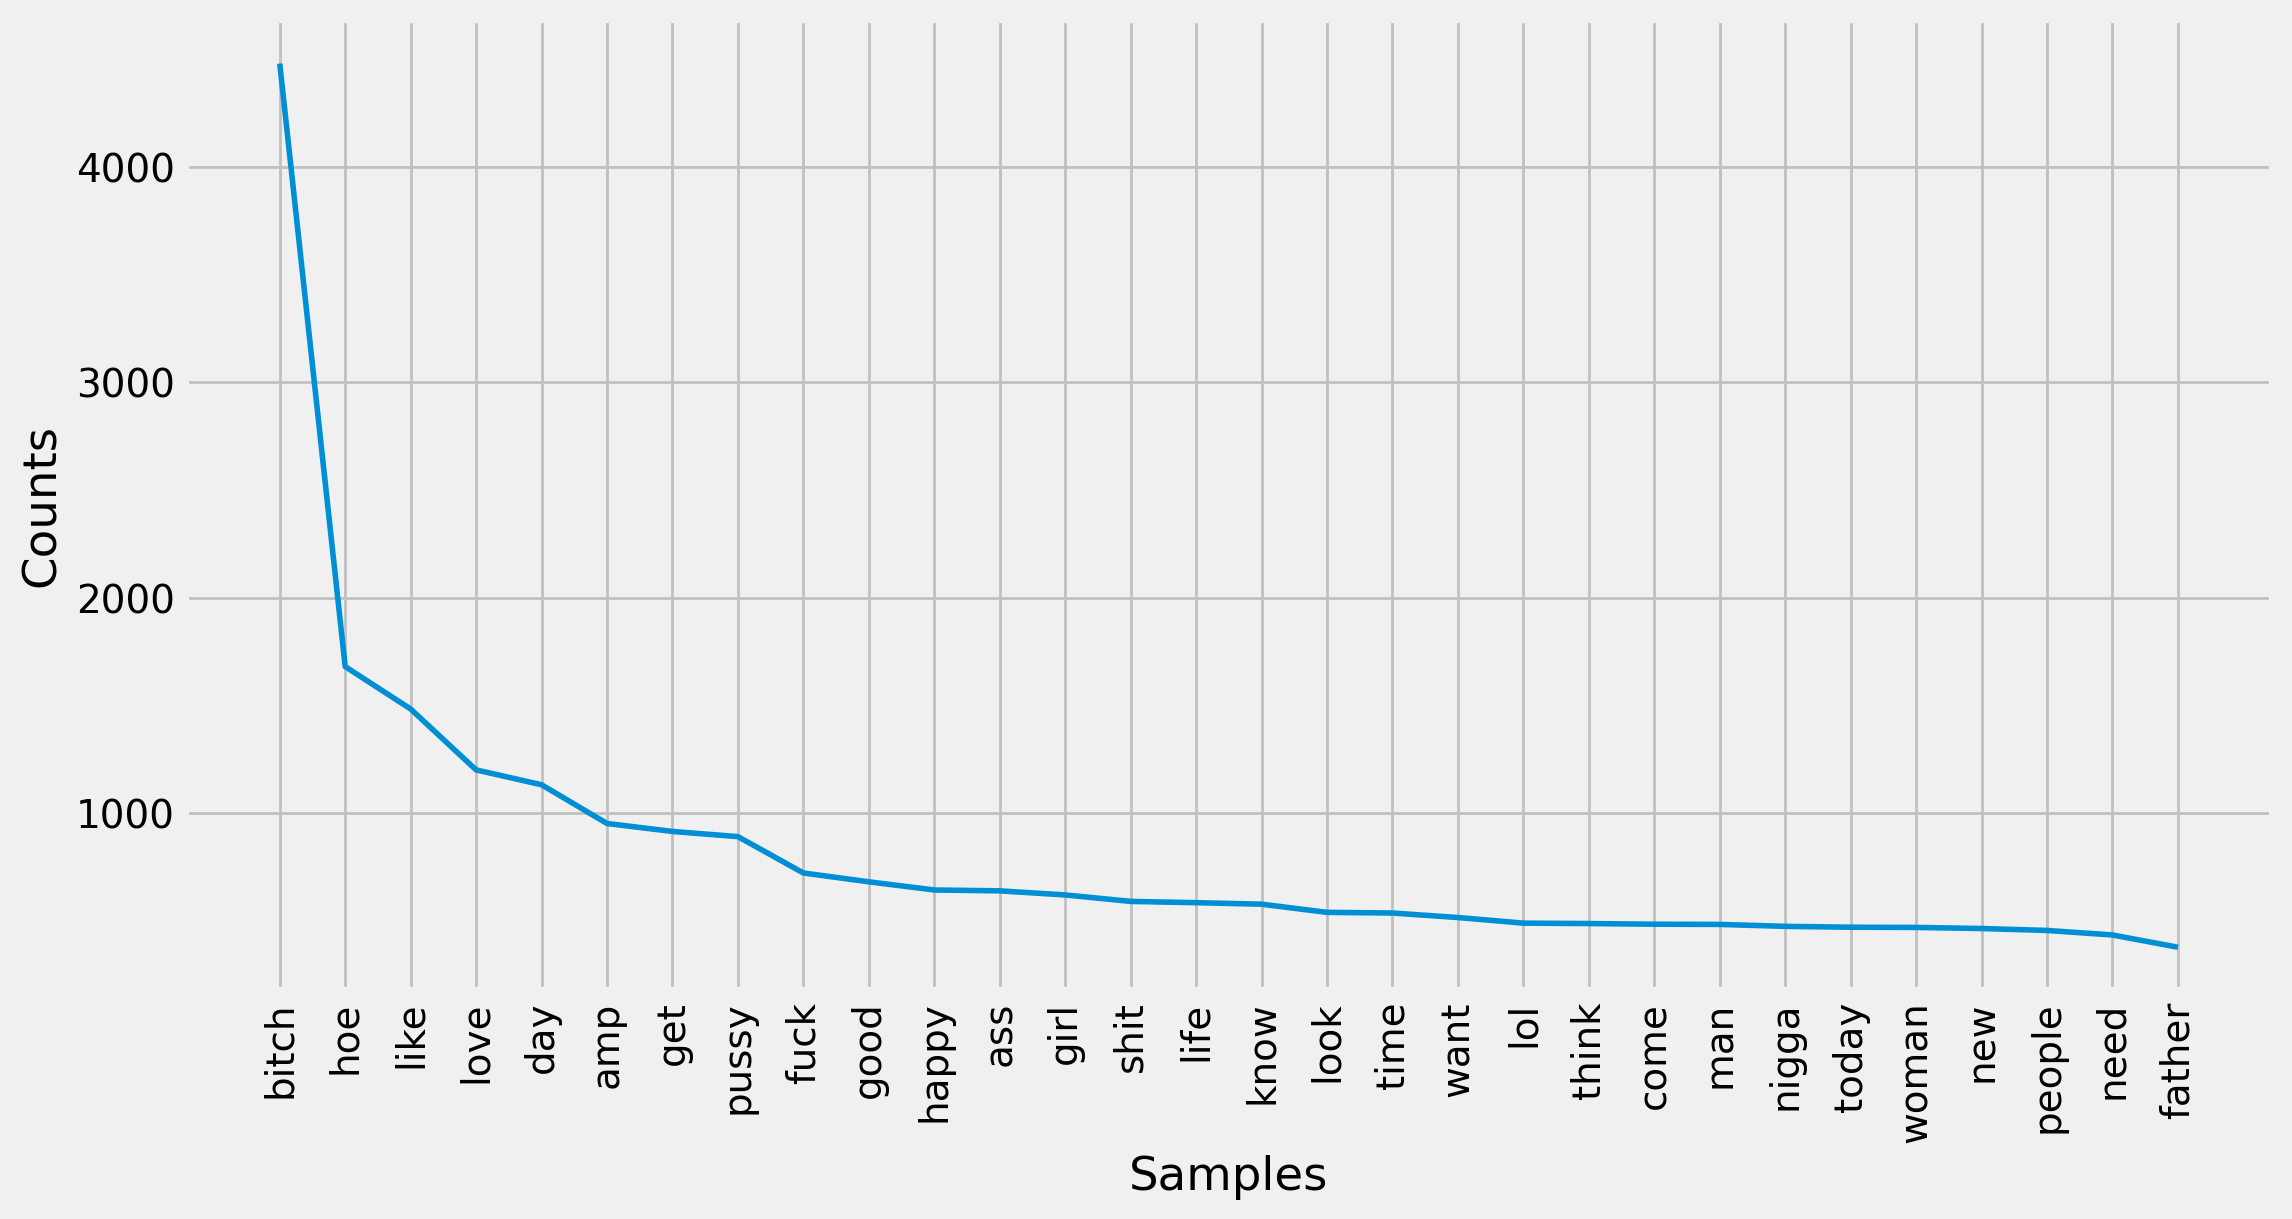

In [162]:
from nltk import FreqDist
from nltk import word_tokenize
import matplotlib.pyplot as plt

fd = FreqDist(sum(df['preproc_step_8'].map(word_tokenize), []))
plt.rcParams["figure.figsize"] = (12,6)
fd.plot(30,cumulative = False)
plt.show()

***

# 13. Most Frequent words in WordCloud View

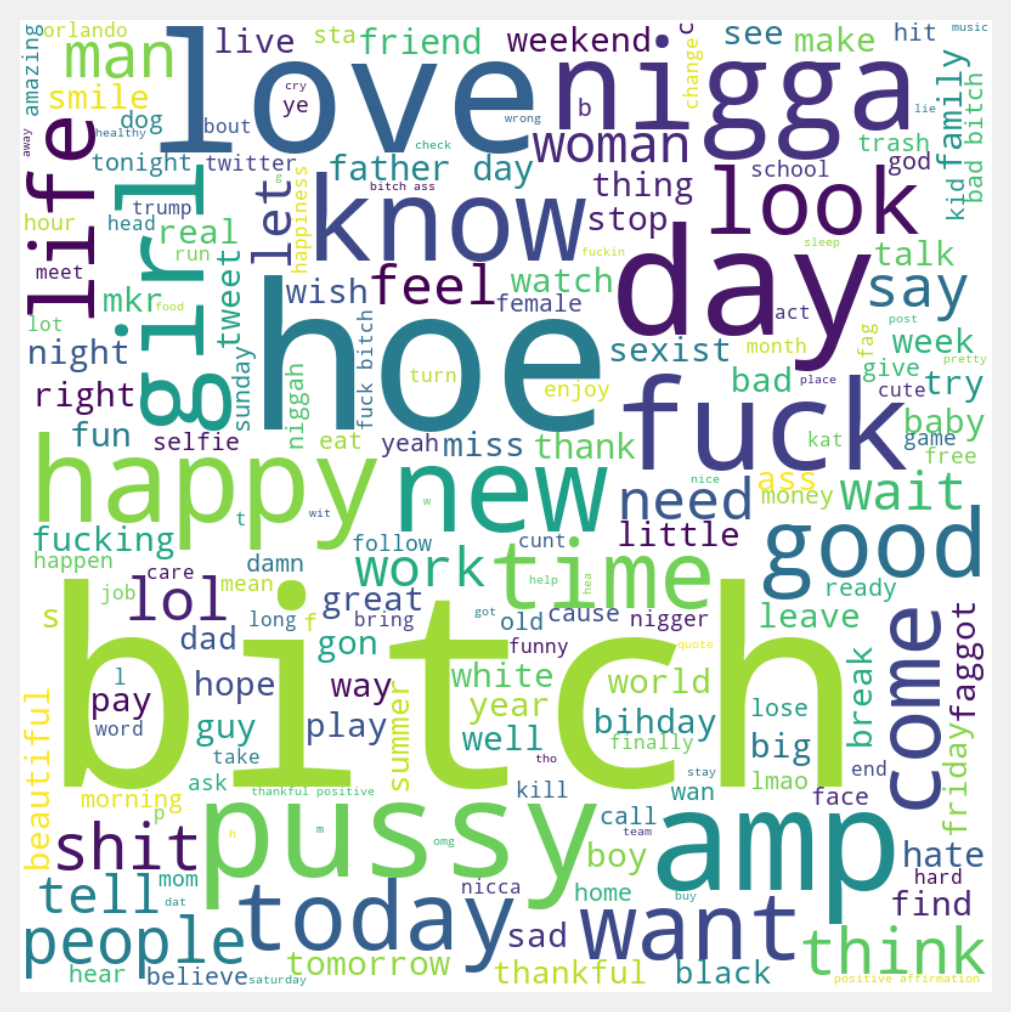

In [163]:
#!pip install wordcloud
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.dpi'] =200


def generate_word_cloud(text):
    wordcloud = WordCloud(width =800, height =800, 
                          background_color = 'white', 
                          max_words = 200, 
                          min_font_size = 10).generate(text)
    return(wordcloud)

text = df['preproc_step_7'].to_string()
wordcloud = generate_word_cloud(text)
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.show()

# 14. Most Frequent Words in DataFrame

In [164]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
def most_freq_words(df_tweet):
    cv = CountVectorizer(stop_words = 'english')
    words = cv.fit_transform(df_tweet.apply(TreebankWordDetokenizer().detokenize))
    sum_words = words.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x: x[1],reverse = True)
    frequency = pd.DataFrame(words_freq, columns=['words','freq'])
    return(frequency)

frequency = most_freq_words(df['preproc_step_7'])
frequency.head(5)


,words,freq
0,bitch,4481
1,hoe,1679
2,like,1482
3,love,1199
4,day,1130


# 15. Most Frequent word in dataset using bar and line plot

<AxesSubplot:xlabel='words', ylabel='freq'>

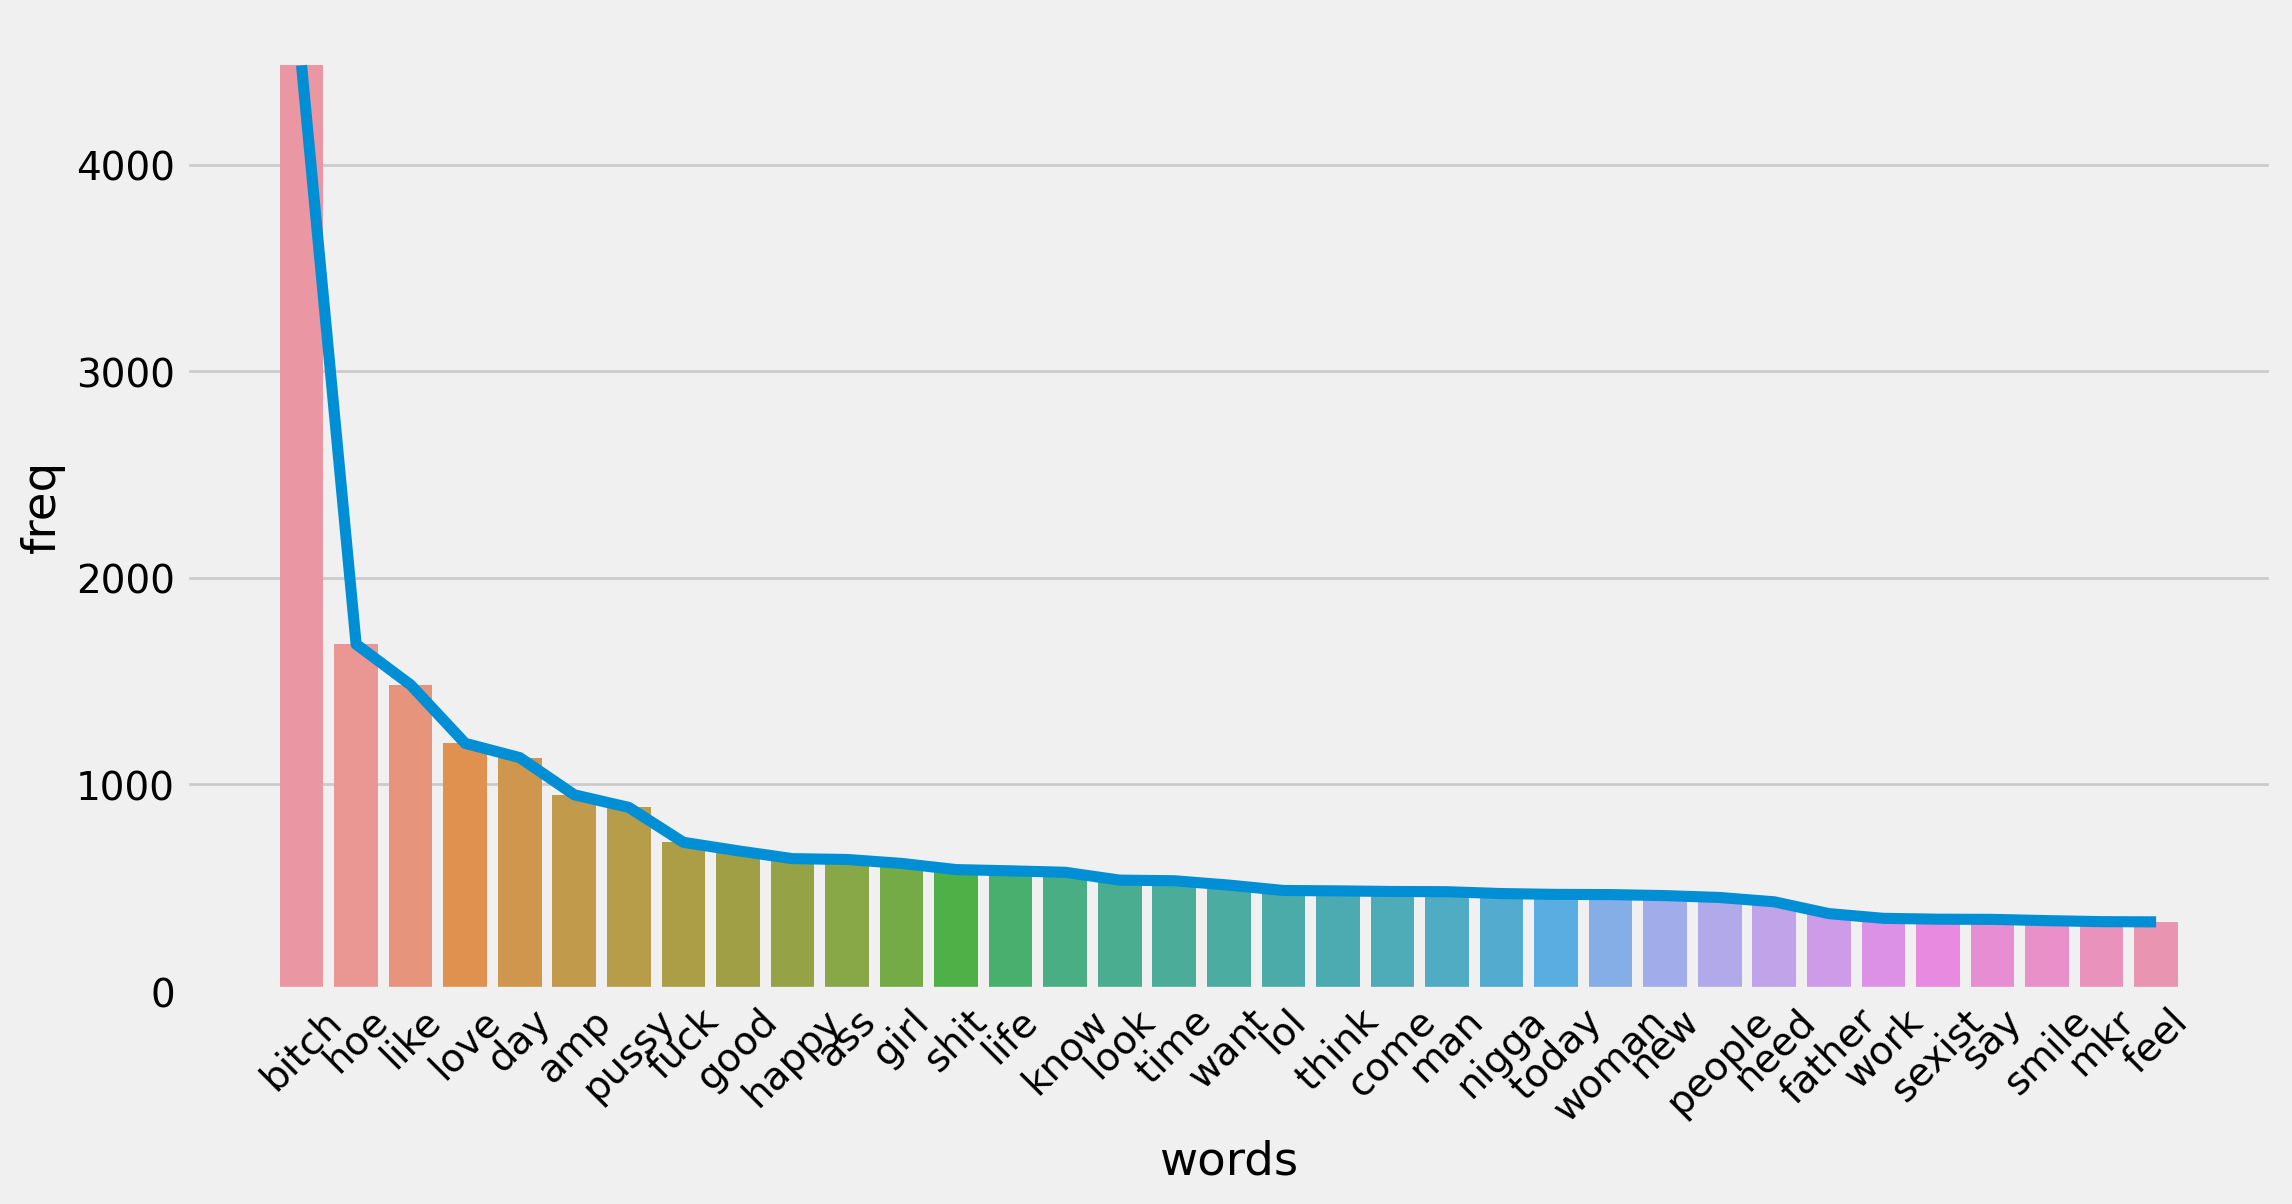

In [165]:
#ax = sns.countplot(x="words", data=frequency )
#sns.countplot(x="words",y="freq"  ,data=frequency.head(5))
plt.xticks(rotation=45)
sns.barplot(data=frequency.head(35), x="words",y='freq')
sns.lineplot(data=frequency.head(35), x="words",y='freq')


# 16. Most Frequent words in Graph View

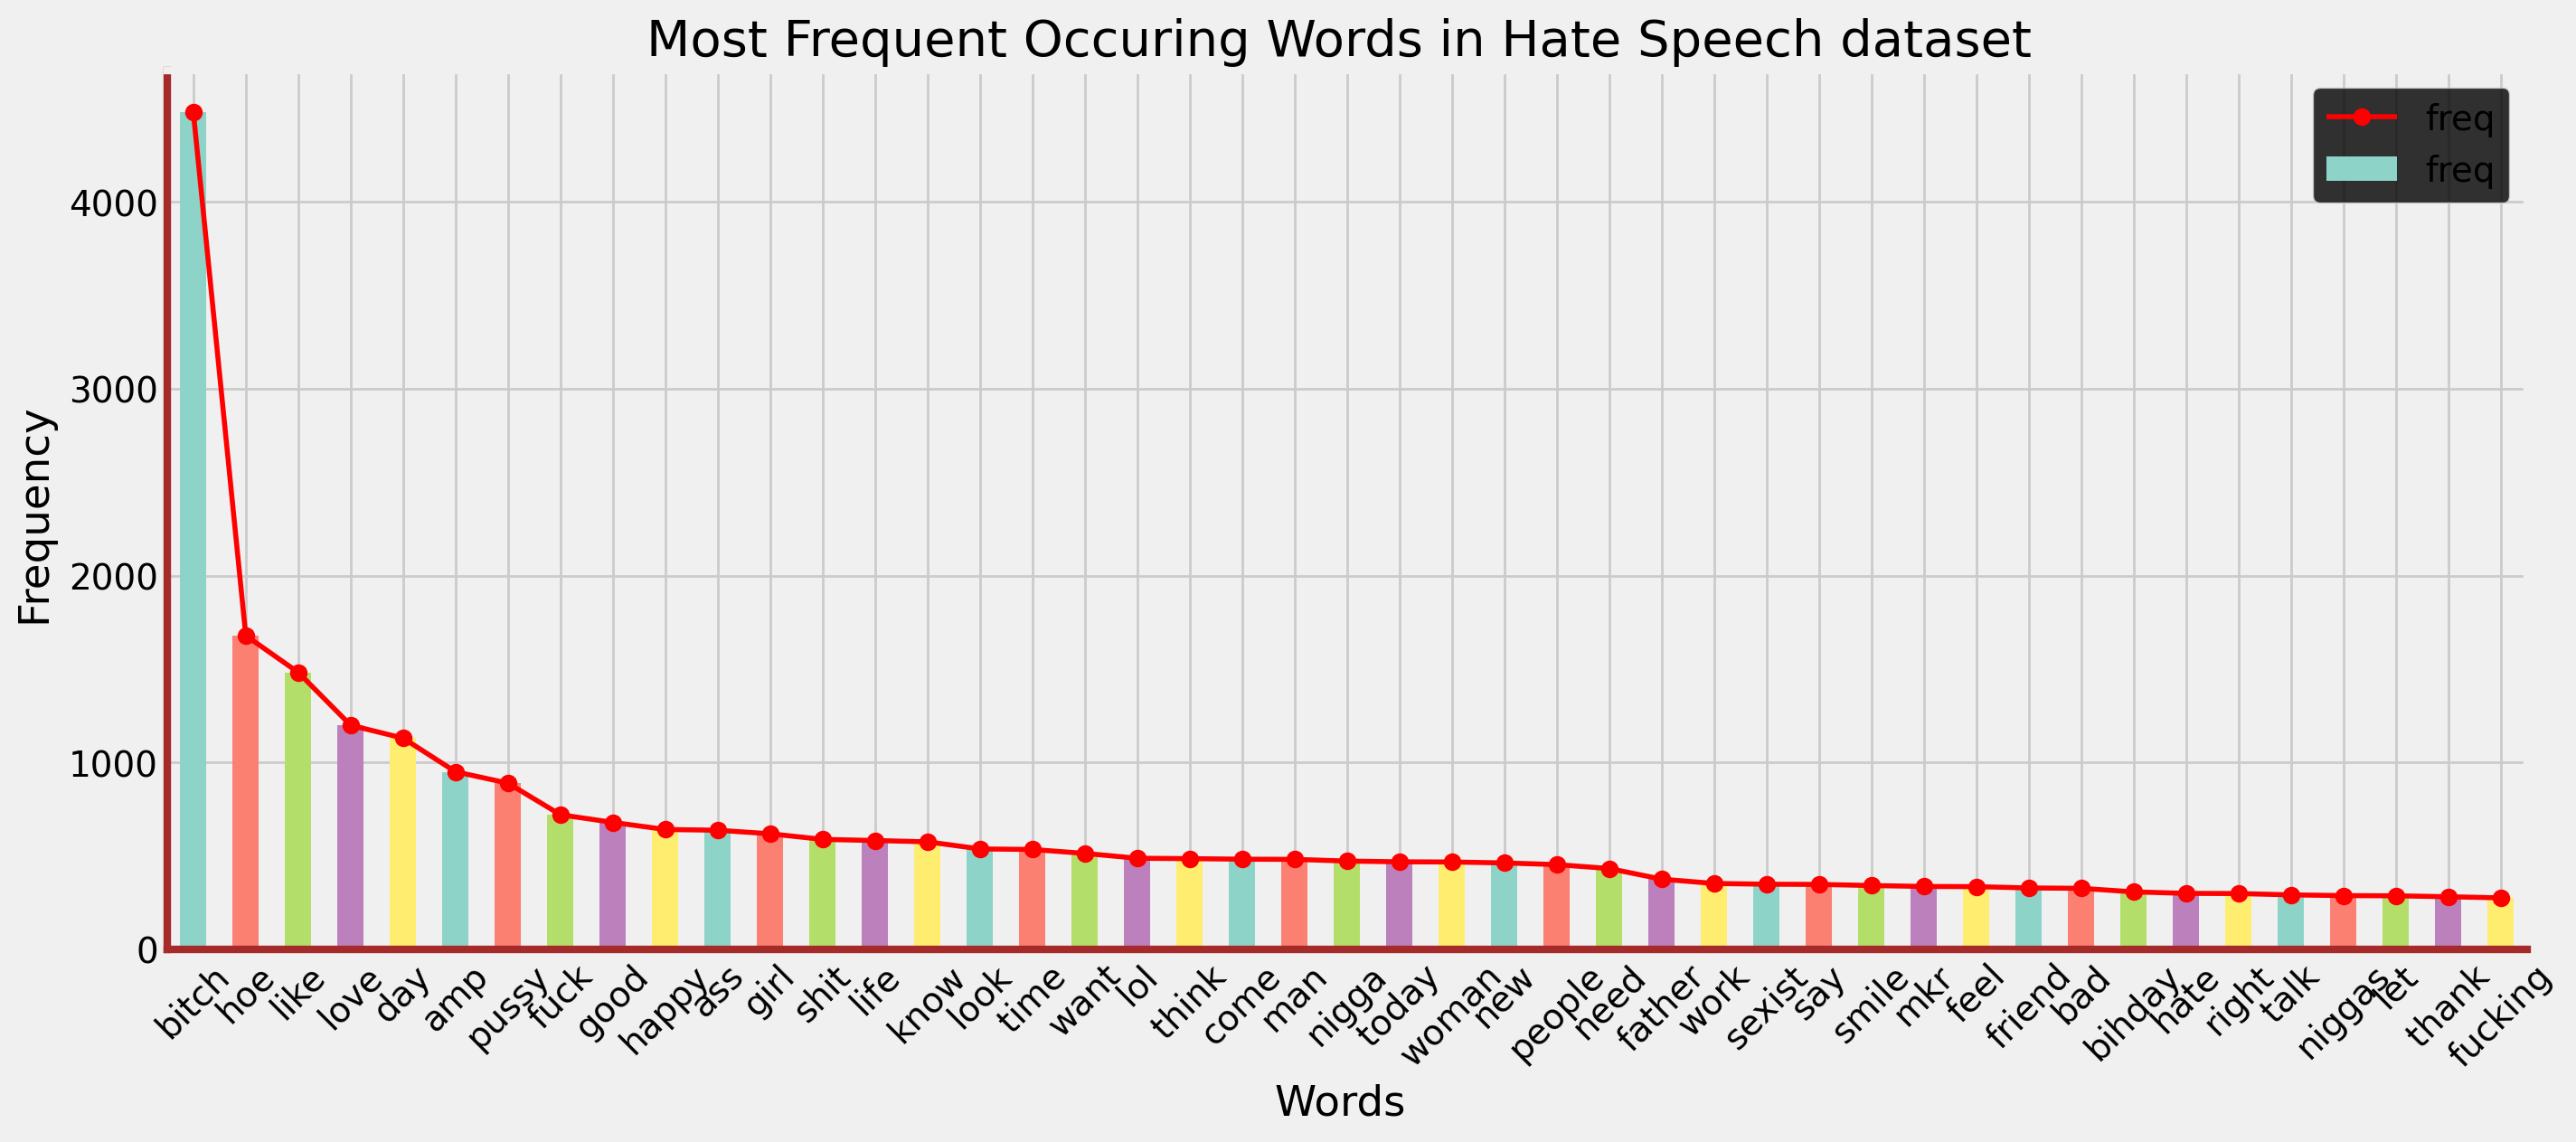

In [166]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_graph_line(df_frequency, no_of_rows):
    gradient = np.linspace(0, 1, 5)
    ax = plt.gca() # to plot two graph in one
    plt.style.use('fivethirtyeight')    #dark_background  , fivethirtyeight
    color = plt.cm.Set3(gradient)
    
    df_frequency.head(no_of_rows).plot(x='words',y='freq',kind='bar',figsize=(15,6),color=color,ax=ax)
    frequency.head(no_of_rows).plot(x='words',y='freq',kind='line',figsize=(15,6),color='red',ax=ax ,linewidth=2, marker='o') #, linestyle='dashed'
    
    plt.title("Most Frequent Occuring Words in Hate Speech dataset ")
    plt.xticks(rotation=45)
    ax.tick_params(axis='x', colors='black') 
    ax.tick_params(axis='y', colors='black')
    ax.spines['left'].set_color('brown')
    ax.spines['bottom'].set_color('brown') 
    ax.set_xlabel('Words ')
    ax.set_ylabel('Frequency ')
    ax.xaxis.label.set_color('black') 
    ax.yaxis.label.set_color('black')
    ax.legend(facecolor='black')
    
    plt.show()

plot_graph_line(frequency, 45)


# Pie Chart view Experiment

1    9998
0    9971
Name: label, dtype: int64


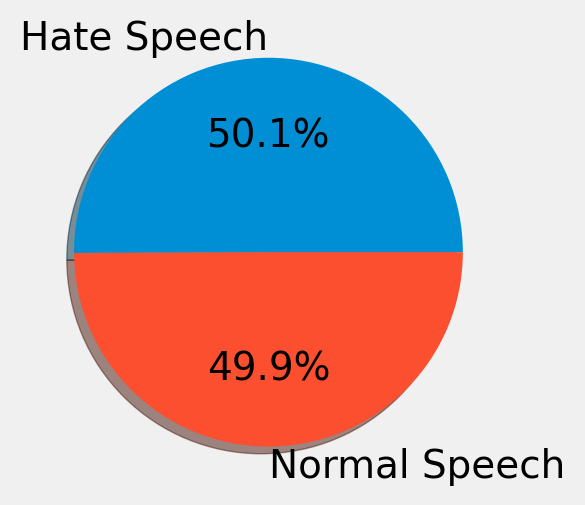

In [172]:
y=df['label'].value_counts()
print(y)
#y= [X_train.shape[0],X_train.shape[1]]
#mylabel1 = ["Rows","Features"]
mylabel1 = ["Hate Speech","Normal Speech"]
myexplode = [0.3, 0]

plt.pie(y, labels = mylabel1 , shadow = True, radius = 1.5,autopct='%0.0001f%%')# ,explode = myexplode
plt.rcParams['figure.figsize'] = [2, 1]

plt.show()

# Stacked Bar View Experiment 

1    9998
0    9971
Name: label, dtype: int64
1    9998
0    9971
Name: label, dtype: int64


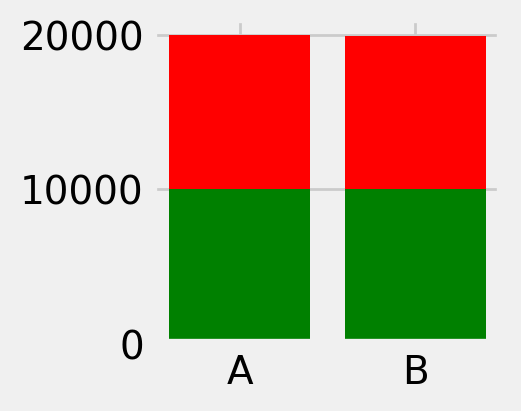

In [168]:
# importing package
import matplotlib.pyplot as plt
  
# create data
x = ['A', 'B']
y1 = df['label'].value_counts() # [X_train.shape[0],X_train.shape[1]]
y2 = df['label'].value_counts() #[X_test.shape[0],X_test.shape[1]]
print(y1)
print(y2)
# plot bars in stack manner
plt.bar(x, y1, color='g')
plt.bar(x, y2, bottom=y1, color='r')
plt.show()

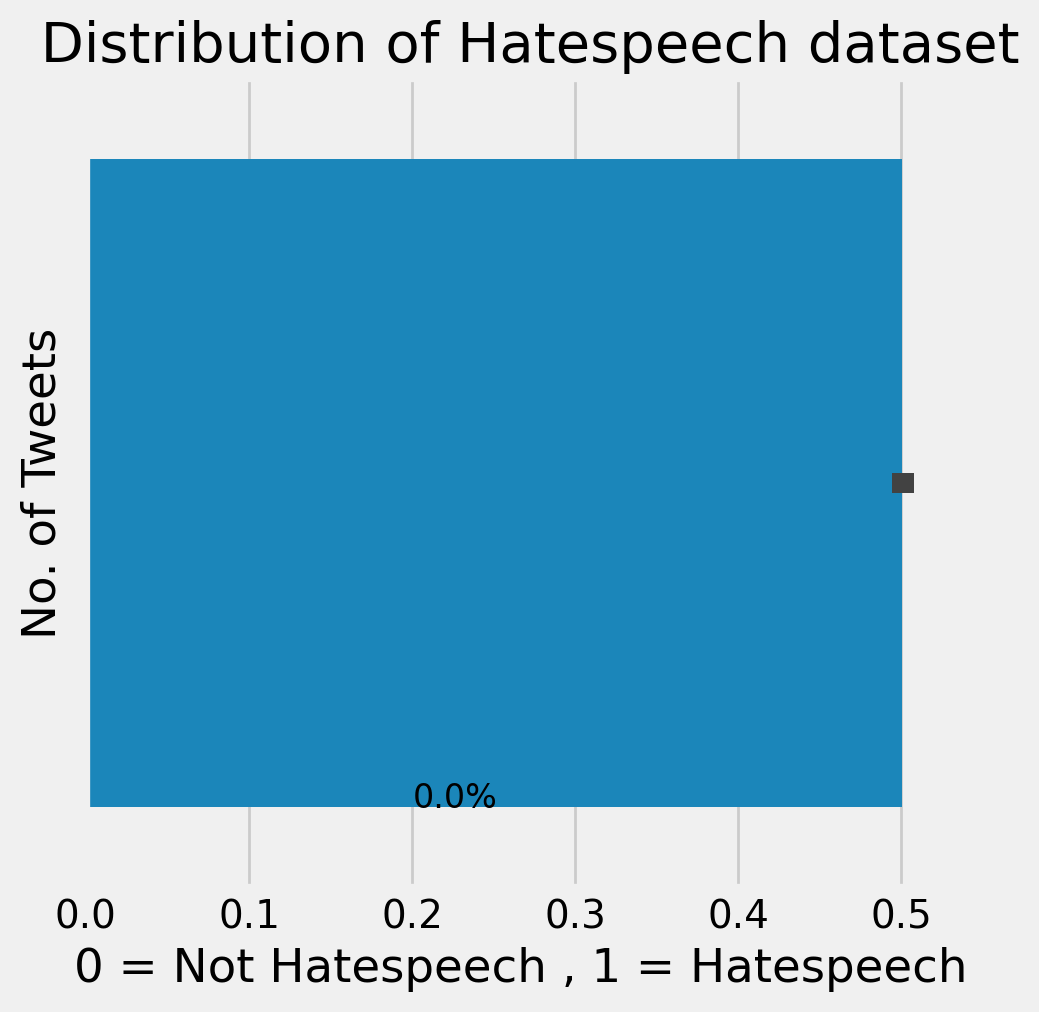

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

#function to show percentage 
def b(df, x_axis):
    total = len(df)
    plt.rcParams["figure.figsize"] = (5,5)
    ax=sns.barplot( x= x_axis, data=df)
    #ax = sns.countplot( x= x_axis, data=df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.title(" Distribution of Hatespeech dataset")
    plt.xlabel('0 = Not Hatespeech , 1 = Hatespeech')
    plt.ylabel('No. of Tweets')
    plt.show()
  
b(df, 'label')

In [170]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# load dataset
newdf = df['label']
print(newdf)
# set the figure size
plt.figure(figsize=(14, 14))

# from raw value to percentage
total = df.groupby('label')['label'].count()
print("==>", total)
t = df['label'].count()
hs = df.groupby('label')['label'].count()[1]
ns = df.groupby('label')['label'].count()[0]
hsp = (hs/t) * 100
nsp = (ns/t) * 100
print("---", nsp)
d = pd.DataFrame()
d.insert(0, "x", hsp, allow_duplicates = False)
d.insert(0, "y", hs, allow_duplicates = False)
d.insert(0, "x1",nsp, allow_duplicates = False)

print(type())
# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x=x,  y=y, data=d, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x=x1, y=y, data=d,color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

0        0
1        0
2        1
3        0
4        1
        ..
19995    1
19996    1
19997    1
19998    0
19999    1
Name: label, Length: 19969, dtype: int64
==> label
0    9971
1    9998
Name: label, dtype: int64
--- 49.9323952125795


TypeError: type() takes 1 or 3 arguments

<Figure size 2800x2800 with 0 Axes>

# Pie Chart with percentage  Experiment

In [ ]:
#df.groupby(['label']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
#figsize=(15,10), autopct='%1.1f%%')

frequency.head(25).plot(x='',y='freq',kind='pie', subplots=True, shadow = True,startangle=90,figsize=(15,10), autopct='%1.1f%%')

In [ ]:
temp3 = df.iloc[0:10,8:9]    #df.iloc[Row_range , Column_range ]
temp3['label'] = df.iloc[0:10,0:1]
temp3.head(10)

#temp3.groupby(['label']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(15,10), autopct='%1.1f%%')
temp3.groupby(['label']).sum().plot( kind='bar')

# 17. Save Data for Modeling

In [ ]:
train  = pd.DataFrame()
train['pre_6'] = df['preproc_step_6'].apply(TreebankWordDetokenizer().detokenize)
train.head(3)

In [173]:
#Final save enitire dataset
df.to_csv("Final_Preprocessed_df123456.csv", index=False)

In [ ]:
#final save only two columns

df1 = pd.DataFrame(columns = ['label','preproc_step_7'])
df1['preproc_step_7'] = df['preproc_step_7']
df1['label'] =df['label'] 
df1.to_csv('p_t.csv',index=False)
pd.read_csv('p_t.csv').head()
#df.head()

# --------------------------- End of Preprocessing Steps  ----------------------------

***

#### <Center> Name - Mohiyaddeen
#### <Center> R&D Project - M.Tech (Advance Computing and Data Science)
#### <Center> University - Integral University 

***

***

***

***

***